           Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Es

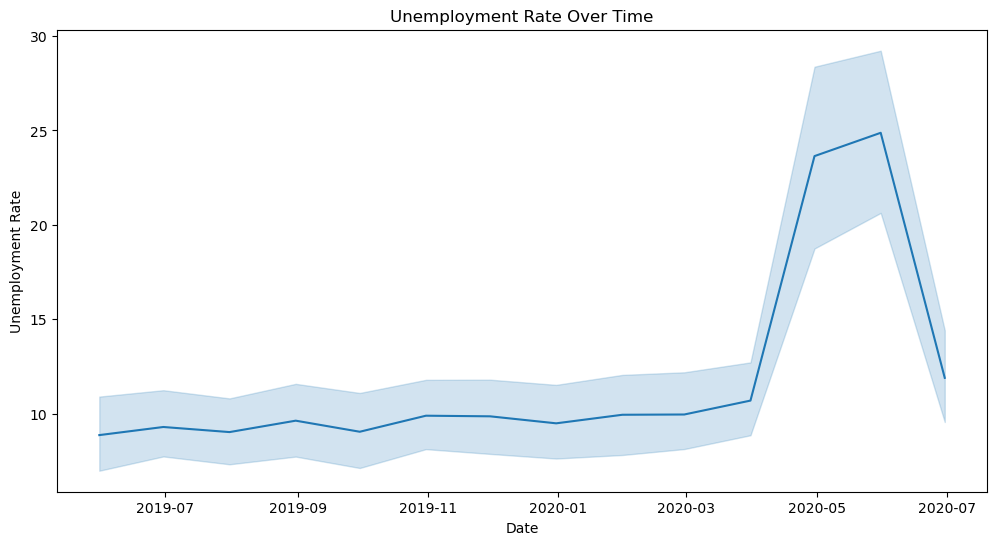

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import ScalarFormatter

# Suppress the specific FutureWarning about 'use_inf_as_na'
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

# Example DataFrame with infinite values
df_example = pd.DataFrame({'A': [1, 2, np.inf, 4, -np.inf]})

# Convert infinite values to NaN
df_example.replace([np.inf, -np.inf], np.nan, inplace=True)

# Load the dataset
file_path = 'Unemployment in India.csv'  # Update with your dataset path
df = pd.read_csv(file_path)

# Strip any leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Display the first few rows of the dataset and column names
print(df.head())
print(df.columns)

# Remove any extra spaces within the date strings
df['Date'] = df['Date'].str.replace(r'\s+', '', regex=True)

# Convert the date column to datetime format with the correct format
# Here we assume dates are in 'dd-mm-yyyy' format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, format='%d-%m-%Y', errors='coerce')

# Verify changes
print(df.info())

# Drop rows with invalid date parsing
df = df.dropna(subset=['Date'])

# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Verify that the 'Year' column has been created correctly
print(df['Year'].head())

# Ensure 'Year' is of type integer
df['Year'] = df['Year'].astype(int)

# Set the date column as the index
df.set_index('Date', inplace=True)

# Verify the index
print(df.head())
print(df.index)



# Perform operations on the DataFrame
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, y='Estimated Unemployment Rate (%)', x=df.index)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.show()


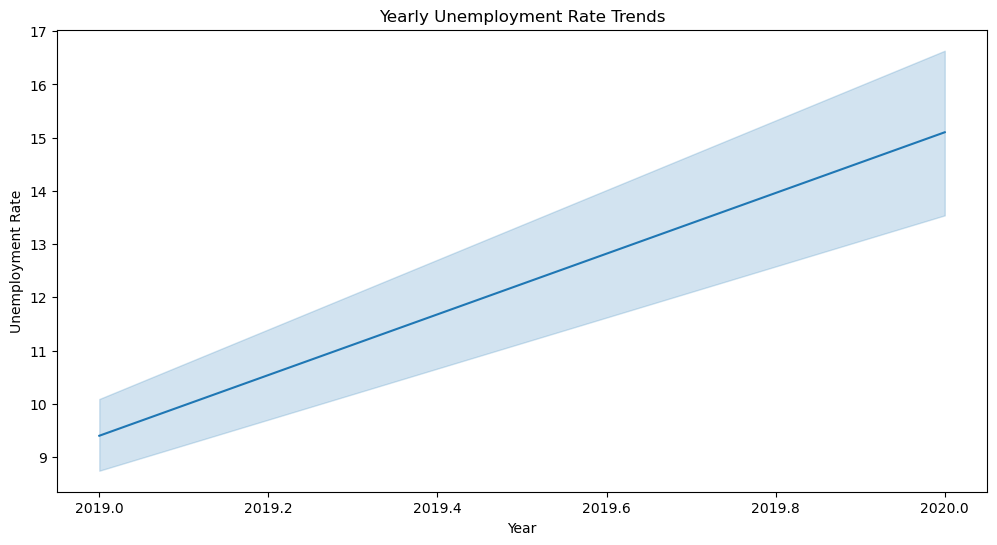

[2019 2020]
Empty DataFrame
Columns: [Region, Frequency, Estimated Unemployment Rate (%), Estimated Employed, Estimated Labour Participation Rate (%), Area, Year]
Index: []


In [2]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Estimated Unemployment Rate (%)', estimator='mean')
plt.title('Yearly Unemployment Rate Trends')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')

# Ensure the x-axis labels are displayed as integers
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')

plt.show()
print(df['Year'].unique())
invalid_years = df[~df['Year'].between(1900, 2100)]  # Adjust the range as necessary
print(invalid_years)
df = df[df['Year'].between(1900, 2100)]  # Adjust the range as necessary


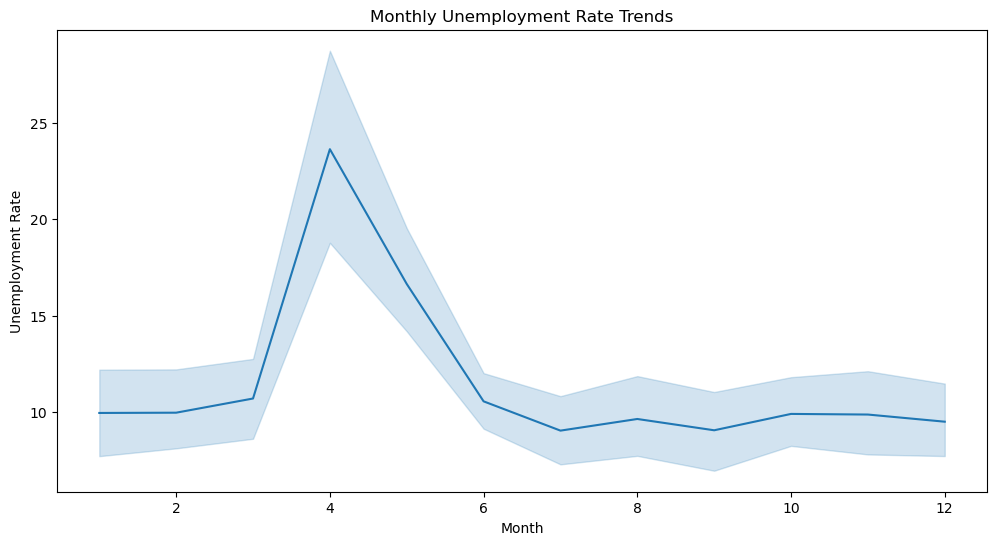

In [3]:

# Additional analysis (e.g., monthly or yearly trends)
df['Year'] = df.index.year
df['Month'] = df.index.month

# Plotting monthly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Estimated Unemployment Rate (%)', estimator='mean')
plt.title('Monthly Unemployment Rate Trends')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.show()


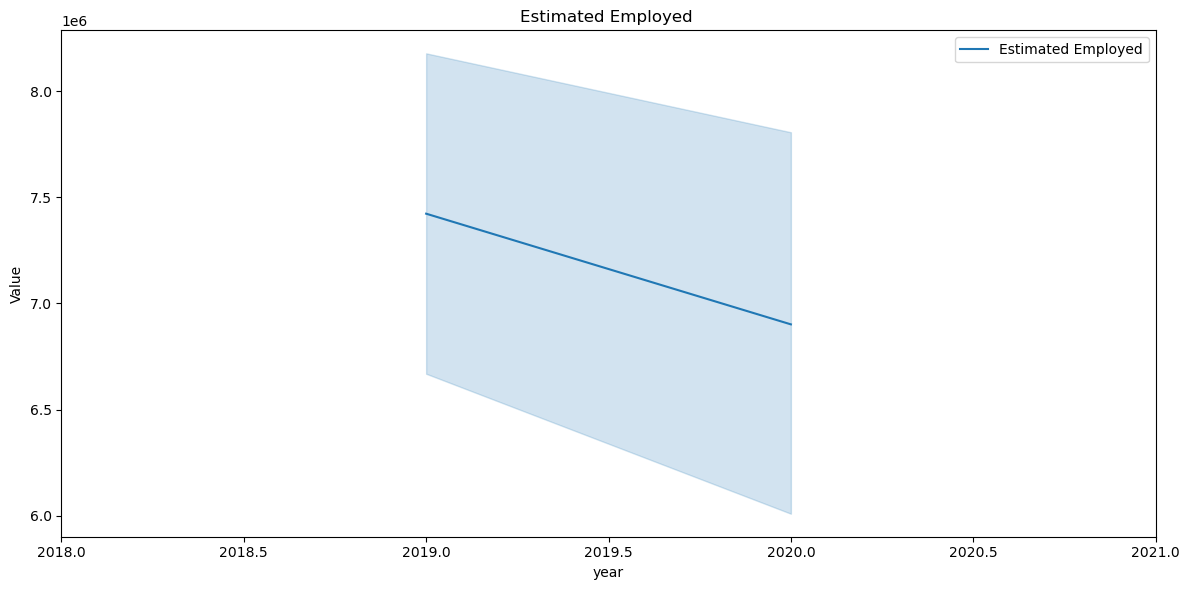

In [4]:
plt.figure(figsize=(12, 6))

# Plot Estimated Employed
sns.lineplot(data=df, x='Year', y='Estimated Employed', label='Estimated Employed')

# Plot Estimated Employment Participation Rate
#sns.lineplot(data=df, x='Year', y='Estimated Employment Participation Rate (%)', label='Employment Participation Rate')

plt.title('Estimated Employed ')
plt.xlabel('year')
plt.ylabel('Value')
plt.legend()
plt.xlim(2018, 2021)

plt.tight_layout()

plt.show()


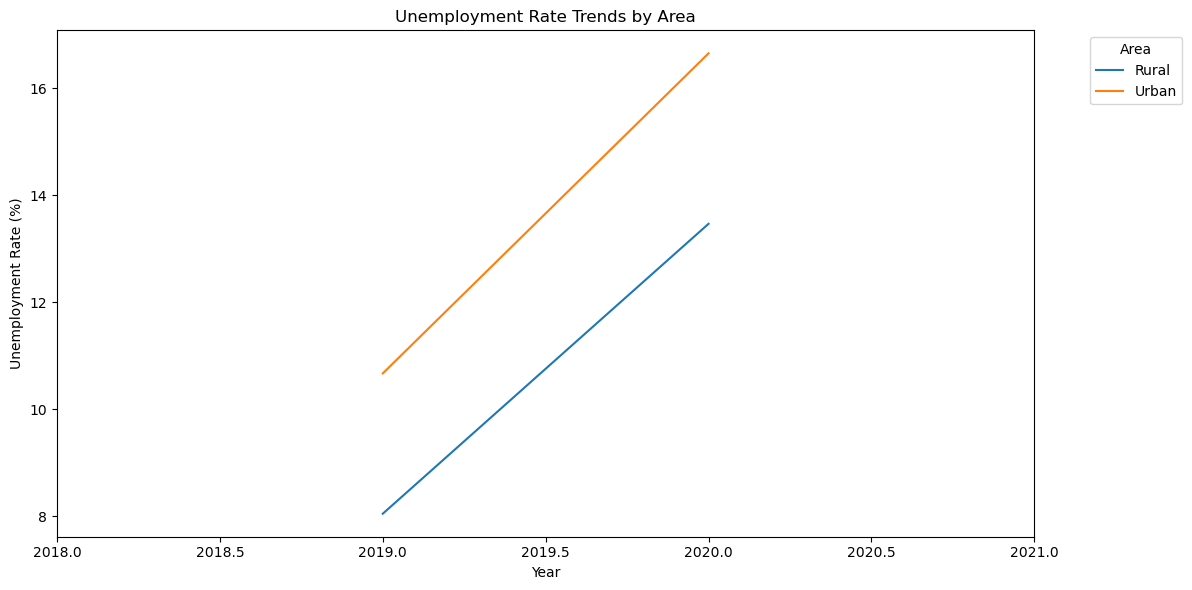

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Estimated Unemployment Rate (%)', hue='Area', errorbar=None)
plt.title('Unemployment Rate Trends by Area')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x-axis limits to range from 1900 to 2022
plt.xlim(2018, 2021)

plt.tight_layout()
plt.show()


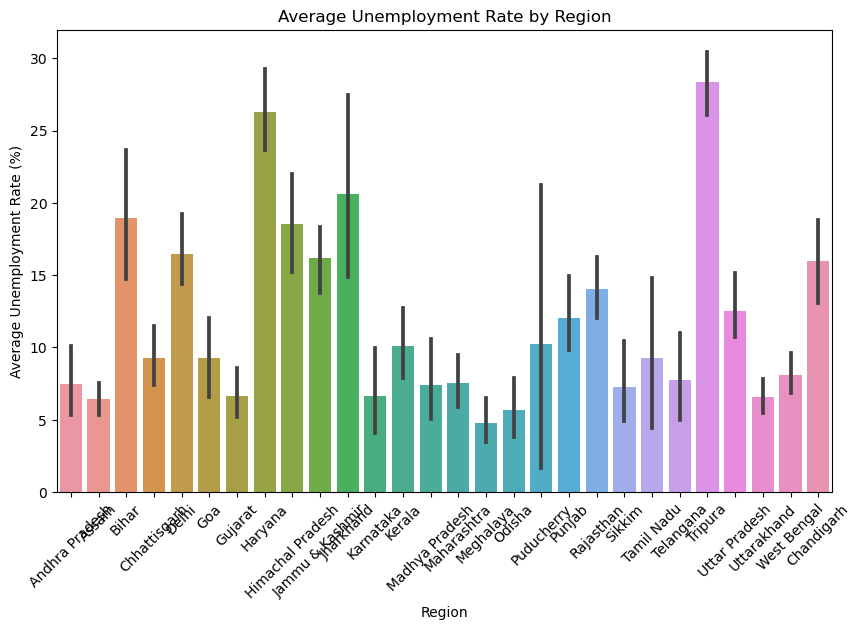

In [6]:
# Remove any extra spaces within the region strings
df['Region'] = df['Region'].str.strip()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Estimated Unemployment Rate (%)', estimator='mean')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()